In [5]:
import IPython, graphviz, re
from io import StringIO
from IPython.display import Image
import numpy as np
import pandas as pd
import math
from sklearn import tree
from sklearn.datasets import load_boston, load_iris
from collections import defaultdict
import string
import re
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# inspired by Mark Needham's blog
# https://markhneedham.com/blog/2017/09/23/python-3-create-sparklines-using-matplotlib/

#def sparkline(data, filename, fill=False, figsize=(4, 0.25), **kwags):
"""
Save a sparkline image
"""

boston = load_boston()

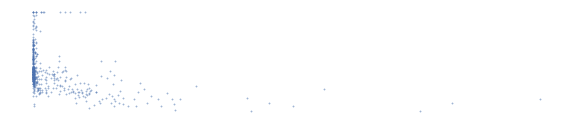

In [11]:
data = boston.data
feature_names = boston.feature_names
target = boston.target

fig, ax = plt.subplots(1, 1, figsize=(10,2))
ax.scatter(data[:,0], target, s=2, alpha=.5)
# ax.scatter(data[:,1], target, s=2)
# ax.scatter(data[:,2], target, s=2)
for k,v in ax.spines.items():
    v.set_visible(False)
ax.set_xticks([])
ax.set_yticks([])

plt.show()

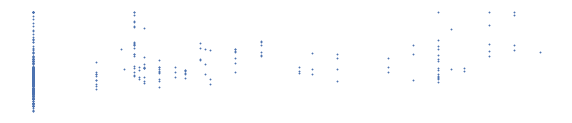

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(10,2))
ax.scatter(data[:,1], target, s=2)
for k,v in ax.spines.items():
    v.set_visible(False)
ax.set_xticks([])
ax.set_yticks([])

plt.show()

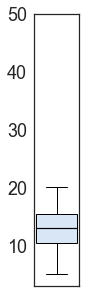

In [13]:
y = np.array([16.2, 18., 14.3, 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14., 14.4, 13.4, 15.6
, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 19.4, 17., 15.6, 13.1, 17.8, 16.8, 13.8, 13.8
, 13.9, 13.3, 13.1, 10.2, 10.9, 11.3, 12.3, 8.8, 7.2, 10.5, 7.4, 10.2, 11.5, 15.1
, 23.2, 9.7, 13.8, 12.7, 13.1, 12.5, 8.5, 5., 6.3, 5.6, 7.2, 12.1, 8.3, 8.5
, 5., 11.9, 7., 7.2, 7.5, 10.4, 8.8, 8.4, 16.7, 14.2, 13.4, 8.3, 10.9, 11.
, 9.5, 14.3, 11.7, 13.4, 9.6, 8.7, 8.4, 12.8, 10.5, 17.1, 18.4, 15.4, 10.8, 11.8
, 14.9, 12.6, 14.1, 13., 13.4, 15.2, 16.1, 14.9, 14.1, 12.7, 13.5, 14.9, 20., 16.4
, 17.7, 19., 16.7, 12., 14.6, 15.2, 7., 8.1, 13.6])

fig, ax = plt.subplots(1, 1, figsize=(.8,5))
ax.xaxis.set_visible(False)
ax.set_xticks([])
#ax.set_xlim(0,.2)

y_range = (3,50)
ax.set_ylim(y_range)
ax.tick_params(axis='both', which='major', labelsize=18)
meanprops = {'linewidth':1.2,'linestyle':'-','color':'black'}
bp =ax.boxplot(y, notch=False, medianprops={'linewidth':0}, meanprops=meanprops,
           widths=[.9], showmeans=True, meanline=True, sym='', patch_artist=True)
BLUE = "#D9E6F5"
YELLOW = "#fefecd"
for patch in bp['boxes']:
    patch.set(facecolor=BLUE)       
plt.show()

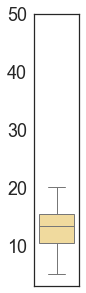

In [14]:
import seaborn as sns

fig, ax = plt.subplots(1, 1, figsize=(.8,5))
sns.set(style="white")
ax.set_ylim(3,50)
#ax.set_ylim('', fontsize=28, fontname="Arial)
#plt.xticks(fontsize=38)
plt.tick_params(axis='both', which='major', labelsize=18)
ax = sns.boxplot(y=y, color='#fee090', ax=ax, linewidth=1, sym='')

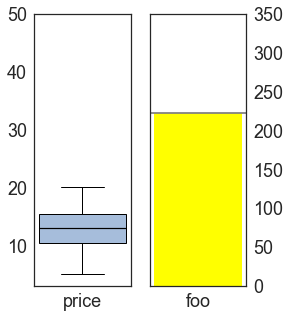

In [104]:
y = np.array([16.2, 18., 14.3, 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14., 14.4, 13.4, 15.6
, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 19.4, 17., 15.6, 13.1, 17.8, 16.8, 13.8, 13.8
, 13.9, 13.3, 13.1, 10.2, 10.9, 11.3, 12.3, 8.8, 7.2, 10.5, 7.4, 10.2, 11.5, 15.1
, 23.2, 9.7, 13.8, 12.7, 13.1, 12.5, 8.5, 5., 6.3, 5.6, 7.2, 12.1, 8.3, 8.5
, 5., 11.9, 7., 7.2, 7.5, 10.4, 8.8, 8.4, 16.7, 14.2, 13.4, 8.3, 10.9, 11.
, 9.5, 14.3, 11.7, 13.4, 9.6, 8.7, 8.4, 12.8, 10.5, 17.1, 18.4, 15.4, 10.8, 11.8
, 14.9, 12.6, 14.1, 13., 13.4, 15.2, 16.1, 14.9, 14.1, 12.7, 13.5, 14.9, 20., 16.4
, 17.7, 19., 16.7, 12., 14.6, 15.2, 7., 8.1, 13.6])

fig, axes = plt.subplots(1, 2, figsize=(3.8,5))
plt.subplots_adjust(wspace=.2)
ax0 = axes[0]
#ax0.xaxis.set_visible(False)
#ax0.set_xlabel("price", fontsize=18)
ax0.set_xticklabels(['ss','abc'])
#ax0.set_xticks([3], minor=True)

y_range = (3,50)
ax0.set_ylim(y_range)
ax0.tick_params(axis='both', which='major', labelsize=18)
meanprops = {'linewidth':1.2,'linestyle':'-','color':'black'}
bp =ax0.boxplot(y, notch=False,
                medianprops={'linewidth':0}, 
                meanprops=meanprops,
                widths=[.9],
                showmeans=True,
                meanline=True,
                sym='',
                labels=["price"],
                patch_artist=True)

BLUE = "#D9E6F5"
YELLOW = "#fefecd"
for patch in bp['boxes']:
    patch.set(facecolor='#a6bddb')       
    
ax1 = axes[1]
#ax1.xaxis.set_visible(False)
ax1.set_xticklabels(['foo'])
# ax1.set_xticklabels(['ff'], minor=False)
#ax1.set_xlabel("n", fontsize=18)
ax1.yaxis.tick_right()
ax1.set_ylim(0,350)
ax1.tick_params(axis='both', which='major', labelsize=18)
ax1.bar(0,223,color='yellow',tick_label='foo', linewidth=0)
ax1.axhline(223, color="grey")
plt.show()

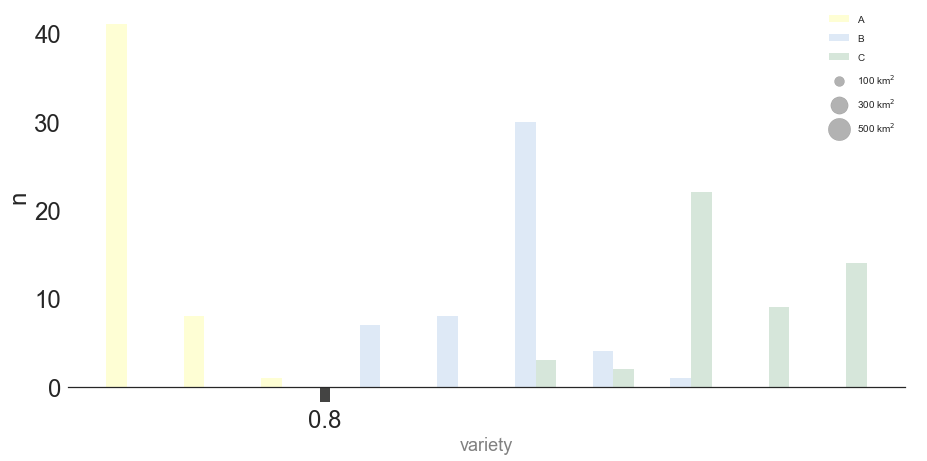

In [210]:
from animl.trees import *

precision = 1
GREY = '#444443'

iris = load_iris()
data = pd.DataFrame(iris.data)
data.columns = iris.feature_names

clf = tree.DecisionTreeClassifier(max_depth=2, random_state=666)
clf = clf.fit(data, iris.target)

YELLOW = "#fefecd" # "#fbfbd0" # "#FBFEB0"
BLUE = "#D9E6F5"
GREEN = "#cfe2d4"
DARKBLUE = '#313695'
DARKGREEN = '#006400'
LIGHTORANGE = '#fee090'
LIGHTBLUE = '#a6bddb'
GREY = '#444443'
dark_colors = [DARKBLUE, DARKGREEN, '#a50026', '#fdae61', '#c51b7d', '#fee090']
mycolors = [YELLOW,BLUE,GREEN]

class_names=["setosa", "versicolor", "virginica"]
shadow_tree = ShadowDecTree(clf, data, 
                            feature_names=iris.feature_names, 
                            class_names=class_names)

node = shadow_tree.root
    
fig, ax = plt.subplots(1, 1, figsize=(15,7))
ax.set_xlabel(f"variety", fontsize=18, fontname="Arial",
              color='grey')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

n_classes = 3
class_names = ['A','B','C']

X = iris.data
y = iris.target
X = X[:,node.feature()]
X, y = X[node.samples()], y[node.samples()]

X_hist = [X[y==cl] for cl in range(n_classes)]
X_hist

binwidth = 30
hist,bins,barcontainers = ax.hist(X_hist,
              color=mycolors,
               #bins=np.arange(min(X), max(X) + binwidth , binwidth),
               label=class_names,
               linewidth=3,
              alpha=.85)
#ax.legend(prop={'size': 18})

for area in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.3, s=area,
                label=str(area) + ' km$^2$')
plt.legend(scatterpoints=1, labelspacing=1)

for patch in barrects:
    for rect in patch.patches:
#         rect.linestyle='solid'
        rect.set_linewidth(1.2)
        rect.set_edgecolor(GREY)
    
#    print(patch)
#    patch.set(facecolor='#a6bddb')   
    
ax.set_xticks([round(node.split(),precision)])
ax.set_ylabel("n", fontsize=24)
ax.tick_params(axis='x', direction='out', length=15, width=10, color=GREY,
               labelsize=24)
ax.tick_params(axis='y', color=GREY, labelsize=24)
plt.show()

In [203]:
X_hist

[array([0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1,
        0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.5, 0.2, 0.2,
        0.4, 0.2, 0.2, 0.2, 0.2, 0.4, 0.1, 0.2, 0.1, 0.2, 0.2, 0.1, 0.2,
        0.2, 0.3, 0.3, 0.2, 0.6, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2]),
 array([1.4, 1.5, 1.5, 1.3, 1.5, 1.3, 1.6, 1. , 1.3, 1.4, 1. , 1.5, 1. ,
        1.4, 1.3, 1.4, 1.5, 1. , 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4,
        1.4, 1.7, 1.5, 1. , 1.1, 1. , 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3,
        1.3, 1.2, 1.4, 1.2, 1. , 1.3, 1.2, 1.3, 1.3, 1.1, 1.3]),
 array([2.5, 1.9, 2.1, 1.8, 2.2, 2.1, 1.7, 1.8, 1.8, 2.5, 2. , 1.9, 2.1,
        2. , 2.4, 2.3, 1.8, 2.2, 2.3, 1.5, 2.3, 2. , 2. , 1.8, 2.1, 1.8,
        1.8, 1.8, 2.1, 1.6, 1.9, 2. , 2.2, 1.5, 1.4, 2.3, 2.4, 1.8, 1.8,
        2.1, 2.4, 2.3, 1.9, 2.3, 2.5, 2.3, 1.9, 2. , 2.3, 1.8])]

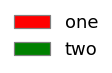

In [123]:
import matplotlib.patches as patches
from matplotlib.patches import FancyBboxPatch
from matplotlib.transforms import Bbox
from matplotlib.figure import figaspect


fs = figaspect(1/3)
fs = (1,1)
fig, ax = plt.subplots(1, 1, figsize=fs)
ax.legend(handles=[box1,box2],
               frameon=False,
                loc='center',
#          bbox_to_anchor=(0.0, 0.0),
                edgecolor='grey',
         fontsize=18)

box1 = patches.Rectangle((0, 0), 20, 10, linewidth=1.2, edgecolor='grey',
                         facecolor='red', label='one')
#ax.add_patch(box1)
box2 = patches.Rectangle((0, 0), 0, 0, linewidth=1.2, edgecolor='grey',
                         facecolor='green', label='two')

ax.set_xlim(0,20)
ax.set_ylim(0,10)
ax.axis('off')
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

plt.tight_layout()

plt.savefig("/tmp/legend.svg", bbox_inches='tight', pad_inches=0)

plt.show()

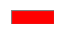

In [148]:
import matplotlib.patches as patches
from matplotlib.patches import FancyBboxPatch
from matplotlib.transforms import Bbox
from matplotlib.figure import figaspect

fs = (1,1)
fig, ax = plt.subplots(1, 1, figsize=(1,.6))
box1 = patches.Rectangle((0, 0), 2, 1, linewidth=1.2, edgecolor='grey',
                         facecolor='red', label='one')
ax.add_patch(box1)

ax.set_xlim(0,2)
ax.set_ylim(0,1)
ax.axis('off')
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

plt.tight_layout()

plt.savefig("/tmp/legend.svg", bbox_inches='tight', pad_inches=0)

plt.show()